# Data Scientist Technical Assessment

## ***Instructions:***


***Objective:*** You are given a dataset to predict cognitive test scores of preschoolers given characteristics of their mothers.


***Data dictionary:***

    i - mother's IQ

    a - mother's age at child's birth

    h - indicator showing whether mother completed high school (1=True, 0=False)

    w = 1: mother did not work in first three years of child’s life

    w = 2: mother worked in second or third year of child’s life

    w = 3: mother worked part-time in first year of child’s life

    w = 4: mother worked full-time in first year of child’s life

    score - child's IQ (regressand)


***Tasks:***

1. Prepare the data, rename variables as you see fit and justify. Propose the types of data for each variable (python data types).

2. Transform the data so it's easy to analyze - describe what you did and why

3. Perform the exploratory data analysis

4. Perform a linear regression where the regressand is child's IQ

    A. using a single predictor

    B. using multiple predictors

    C. using multiple predictors with an interaction term



In [68]:
#load required libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


# Part I - II: Data Cleaning & Data Transformation

**Please note while loading initial data in jupyter, error was produced detecting unusual characters. Double checking the text file, I noticed that line -- was not expected and didnot have any matching values. Removing the affected line did the trick and loaded data as expected. The new data I saved is uploaded on github as data_1.txt**

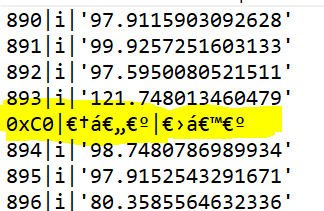

In [69]:
#read text file and convert into CSV
read_file=pd.read_csv (r"C://Users/arevi/Downloads/data_1.txt")
read_file.to_csv (r"C://Users/arevi/Downloads/modified_data.csv", index=None)

Initial text data had one column with all the variables in stacked format and corresponding values in a seperate column. I decided to expand those variables so that they would be columns of a new dataframe for better format and modelling.

Initially I split the column into obvious 3 separate columns that were connected with '|' to create a new df named "s" (split df) 

In [70]:
#import CSV 
df=pd.read_csv("C://Users/arevi/Downloads/modified_data.csv")
print(df.head(5))

#split the only variable into 3 columns 
s=df['count|variable|value'].str.split('|', expand=True)
s.columns=['Count', 'Variables', 'Values']

  count|variable|value
0           0|score|65
1           1|score|98
2           2|score|85
3           3|score|83
4          4|score|115


In [71]:
#check the outcome after splittings - looks as expected
s.head(10)

,Count,Variables,Values
0,0,score,65
1,1,score,98
2,2,score,85
3,3,score,83
4,4,score,115
5,5,score,98
6,6,score,69
7,7,score,106
8,8,score,102
9,9,score,95


After splitting the columns I decided to filter *Variables* col so I would have multiple dfs named below.
Checking the basic statistics on each filtered data we observe that we have a total of 434 rows for each. 
Afterwards I combined them to make a new df of (434X5) size, each row corresponding to the unique observation with the following column variables (child_IQ score, mom_hs, mom_age, work_post_birth, mom_iq). Transpose the newly created df, rename the columns more intuitively for readers, and the outcome looks as expected 434 rows with 5 columns. 

In [72]:
#filtered df on each unique variable name
score=s[s.Variables=="score"]

hs=s[s.Variables=="h"]

age=s[s.Variables=="a"]

wrk=s[s.Variables=="w"]

iq=s[s.Variables=="i"]

score.info()
age.info()
wrk.info()
iq.info()
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 433
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Count      434 non-null    object
 1   Variables  434 non-null    object
 2   Values     434 non-null    object
dtypes: object(3)
memory usage: 13.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 1736 to 2169
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Count      434 non-null    object
 1   Variables  434 non-null    object
 2   Values     434 non-null    object
dtypes: object(3)
memory usage: 13.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 1302 to 1735
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Count      434 non-null    object
 1   Variables  434 non-null    object
 2   Values     434 non-null    object
dtypes: objec

In [73]:
#create df
df=pd.DataFrame([score['Values'].values, hs['Values'].values, age['Values'].values, iq['Values'].values, wrk['Values'].values])

#transpose the df
df=df.T

#change the column names according to the data dictionary
df.columns=['child_IQ', 'mom_HS', 'mom_age', 'mom_IQ', 'work_post_birth']


print(df.info())

#check the final result of df
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   child_IQ         434 non-null    object
 1   mom_HS           434 non-null    object
 2   mom_age          434 non-null    object
 3   mom_IQ           434 non-null    object
 4   work_post_birth  434 non-null    object
dtypes: object(5)
memory usage: 17.1+ KB
None
  child_IQ mom_HS mom_age              mom_IQ work_post_birth
0       65      1      27  '121.117528602603'               4
1       98      1      25  '89.3618817100663'               4
2       85      1      27  '115.443164881725'               4
3       83      1      25  '99.4496394360723'               3
4      115      1      27  '92.7457099982118'               4
5       98      0      18  '107.901837758501'               1
6       69      1      20  '138.893106071162'               4
7      106      1      23  '125.1451194

Please note while format looks ok, all the variables appear as objects. It's obvious that at least age, mom_IQ, and child_IQ need to be numeric variables. moreover, checking the numeric variables, I printed out values of the data that would create error while attempting to convert into numeric type. 

In [74]:
# Print all values in numeric variables that cannot be converted to float
for column_name in ["mom_age", "mom_IQ", "child_IQ"]:
    print("These are the problematic values for the variable: {}".format(column_name))
    for value in df[column_name]:
        try:
            float(value)
        except:
            print(value)

These are the problematic values for the variable: mom_age
These are the problematic values for the variable: mom_IQ
'121.117528602603'
'89.3618817100663'
'115.443164881725'
'99.4496394360723'
'92.7457099982118'
'107.901837758501'
'138.893106071162'
'125.145119475328'
'81.6195261789843'
'95.0730686206496'
'88.5769977185567'
'94.8597081943671'
'88.9628008509596'
'114.114297012333'
'100.534071915245'
'120.419145591086'
'114.426876891447'
'111.592357580831'
'133.849227208159'
'97.2648010634673'
'110.09680614075'
'126.72399416984'
'97.9115903092628'
'99.9257251603133'
'97.5950080521511'
'121.748013460479'
'98.7480786989934'
'97.9152543291671'
'80.3585564632336'
'114.307860633927'
'109.138316302971'
'101.817179733939'
'117.965104313227'
'108.633496913048'
'96.528619145464'
'92.8713754661642'
'95.8981342875886'
'107.015457730577'
'87.1970117452858'
'89.3618817100663'
'102.530987846246'
'130.166860235388'
'83.4141025980336'
'125.75346623026'
'85.8103765615827'
'126.520072628695'
'79.203048104

In [75]:
#remove single quotations around mom iq
df["mom_IQ"]=df["mom_IQ"].str.replace("'", ' ')


In [76]:
#convert those 3 variables to numeric now
df["mom_IQ"]=pd.to_numeric(df["mom_IQ"], downcast="float")
df["mom_age"]=pd.to_numeric(df["mom_age"], downcast="float")
df["child_IQ"]=pd.to_numeric(df["child_IQ"],downcast="float")



#lambda for rounding
df["mom_IQ"]=df["mom_IQ"].map(lambda x: round(x, 2))
df["child_IQ"]=df["child_IQ"].map(lambda x: round(x, 2))

#check result ost round
df["mom_IQ"].head(5)
df["child_IQ"].head(5)

0     65.0
1     98.0
2     85.0
3     83.0
4    115.0
Name: child_IQ, dtype: float64

In [77]:
#check uniqe values in mom_HS col - looks ok as 1,0 boolean
print(df.mom_HS.unique())

#convert work_post_birth to categorical variable
df["work_post_birth"] = df["work_post_birth"].astype("category")

df.work_post_birth.unique()

#check variable types now
print(df.info())

df.head(50)

['1' '0']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   child_IQ         434 non-null    float64 
 1   mom_HS           434 non-null    object  
 2   mom_age          434 non-null    float32 
 3   mom_IQ           434 non-null    float64 
 4   work_post_birth  434 non-null    category
dtypes: category(1), float32(1), float64(2), object(1)
memory usage: 12.6+ KB
None


,child_IQ,mom_HS,mom_age,mom_IQ,work_post_birth
0,65.0,1,27.0,121.12,4
1,98.0,1,25.0,89.36,4
2,85.0,1,27.0,115.44,4
3,83.0,1,25.0,99.45,3
4,115.0,1,27.0,92.75,4
5,98.0,0,18.0,107.90,1
6,69.0,1,20.0,138.89,4
7,106.0,1,23.0,125.15,3
8,102.0,1,24.0,81.62,1
9,95.0,1,19.0,95.07,1


Now we have a cleaner data, with 3 numerical variables ( mom_age, mom_IQ, child_IQ), 1 boolean object, encoded with 1 & 0 (mom_HS) *note this will later be converted into numeric with one-hot encoding for regression analysis*, and 1 categorical object (work_post_birth). We will move to part 2 -Explanatory Data Analysis

# Part III : EDA

In [78]:
#get basic statistics of numerical variables
print(df.describe())

#check for missing values
print(df.isnull().sum())

         child_IQ     mom_age      mom_IQ
count  434.000000  434.000000  434.000000
mean    86.797235   22.785715  100.000092
std     20.410688    2.701069   15.000042
min     20.000000   17.000000   71.040000
25%     74.000000   21.000000   88.660000
50%     90.000000   23.000000   97.920000
75%    102.000000   25.000000  110.272500
max    144.000000   29.000000  138.890000
child_IQ           0
mom_HS             0
mom_age            0
mom_IQ             0
work_post_birth    0
dtype: int64


Based on boxplots and histograms below, the data doesnot seem to be suffering much from outliers. Also we have no missing values; Both IQ scores are fairly symmetrical, their original skewness level <|0.5|. Log transforming mom' IQ scores made data more normal, but it didnot help for child_IQ scores, thus I would leave it untouched for further analysis.  

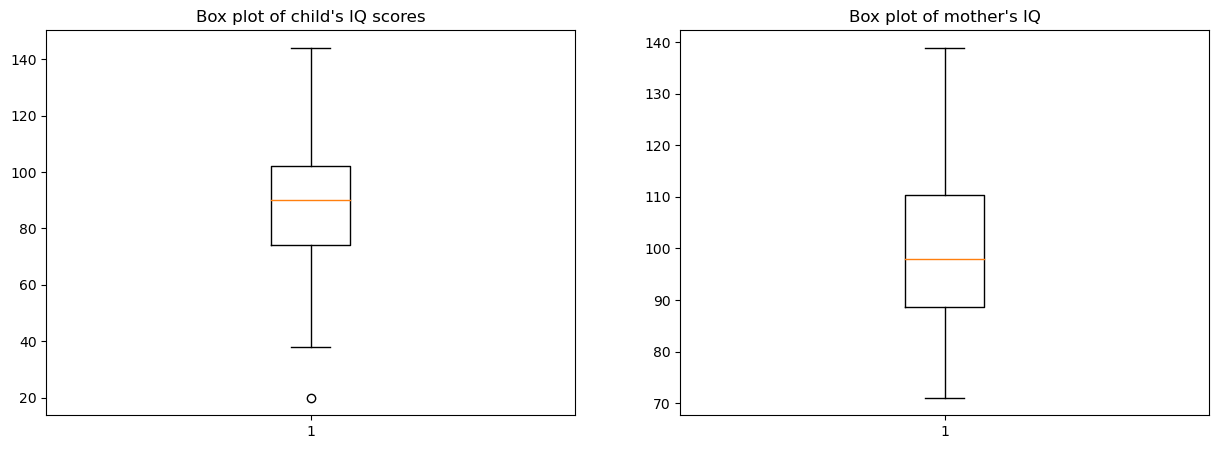

In [79]:
#explore outliers of variables mom_IQ and child_IQ

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(df["child_IQ"])
plt.title("Box plot of child's IQ scores")


plt.subplot(1,2,2)
plt.boxplot(df["mom_IQ"])
plt.title("Box plot of mother's IQ")


plt.show()


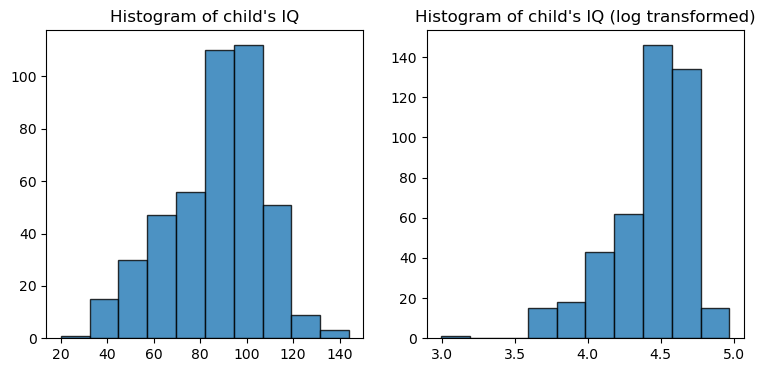

DescribeResult(nobs=434, minmax=(20.0, 144.0), mean=86.79723502304148, variance=416.59620480837805, skewness=-0.46056725349871636, kurtosis=-0.17238157048610692)
DescribeResult(nobs=434, minmax=(2.995732273553991, 4.969813299576001), mean=4.430854769738374, variance=0.07273309971277821, skewness=-1.2069758778592803, kurtosis=1.8435785014171095)


In [80]:
#lets see histograms
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.hist(df["child_IQ"], edgecolor="black", alpha=0.8)
plt.title("Histogram of child's IQ")


plt.subplot(1,2,2)
plt.hist(np.log(df["child_IQ"]), edgecolor="black", alpha=0.8)
plt.title("Histogram of child's IQ (log transformed)")

plt.show()

#normality test
print(stats.describe(df["child_IQ"]))

#log transfor the data
print(stats.describe(np.log(df["child_IQ"])))

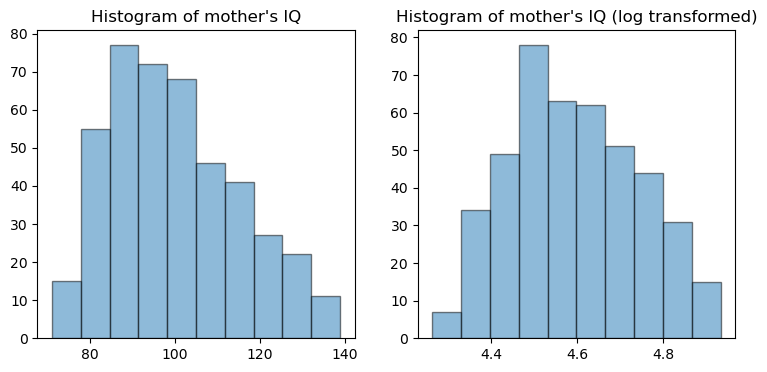

DescribeResult(nobs=434, minmax=(71.04, 138.89), mean=100.00009216589861, variance=225.00124895222493, skewness=0.46672554986827874, kurtosis=-0.5780168531919916)
DescribeResult(nobs=434, minmax=(4.2632430986839145, 4.9336822529281275), mean=4.594190958848788, variance=0.021824240029371698, skewness=0.20328658408695363, kurtosis=-0.7655657911207818)


In [81]:
#lets see histograms
plt.figure(figsize=(9,4))

#raw mom_IQ Data
plt.subplot(1,2,1)
plt.hist(df["mom_IQ"], edgecolor="black", alpha=0.5)
plt.title("Histogram of mother's IQ")


plt.subplot(1,2,2)
plt.hist(np.log(df["mom_IQ"]), edgecolor="black", alpha=0.5)
plt.title("Histogram of mother's IQ (log transformed)")

plt.show()

#normality
print(stats.describe(df["mom_IQ"]))

#log transformed stats
print(stats.describe(np.log(df["mom_IQ"])))

Looking at the categorical variable work_post_birth below, it's interesting to see the distribution of the bar chart. According to the data dictionary we know that w=4 represents mothers who worked full time in first year of child's life and majory of mothers did that, followed by w=2, mothers worked second or third year in childs life, then w=1 - mother didnot work in the first 3 years of child's life, and lastly and w=3 - mother worked part-time in the first year of child's life.

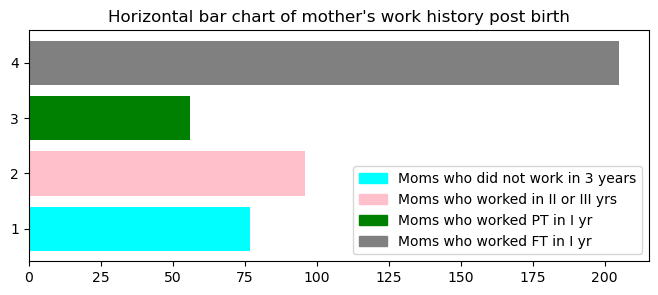

In [82]:
#visuaize categorical variables
import matplotlib.patches as mpatches


plt.figure(figsize=(8,3))
plt.barh(df.groupby("work_post_birth")["work_post_birth"].count().index,
         df.groupby("work_post_birth")["work_post_birth"].count(),
         color=["cyan", "pink", "green", "gray"])
plt.title("Horizontal bar chart of mother's work history post birth")
#add legend

cyan_patch = mpatches.Patch(color='cyan', label='Moms who did not work in 3 years')
pink_patch = mpatches.Patch(color='pink', label='Moms who worked in II or III yrs')
green_patch = mpatches.Patch(color='green', label='Moms who worked PT in I yr')
gray_patch = mpatches.Patch(color='gray', label='Moms who worked FT in I yr')
plt.legend(handles=[cyan_patch, pink_patch, green_patch, gray_patch])


plt.show()

Please see below also tabulated work post birth history for mothers with HS completion vs no HS. Our data suggests that moms who did not work for the first 3 years of child's life were mostly the ones without HS completion, on the other hand, a vast majority of mothers who have completed HS were working full time in the first year of child's life.

In [83]:
#tabular format of  mom_hs & work post birth history
count_table=pd.crosstab(df["mom_HS"], df["work_post_birth"])
print(count_table)

work_post_birth   1   2   3    4
mom_HS                          
0                33  23  11   26
1                44  73  45  179


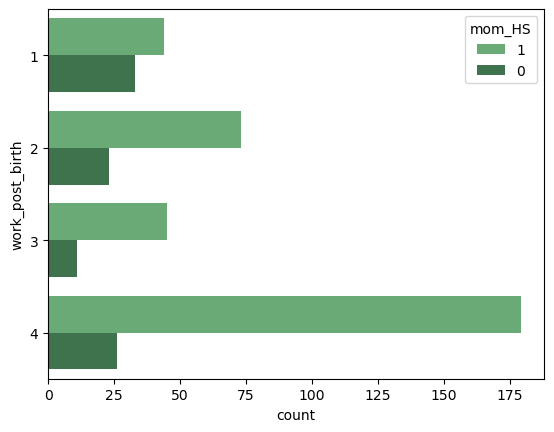

In [85]:
# mom's post birth history for HS vs no HS holders
sns.countplot(y="work_post_birth", hue="mom_HS", data=df, palette="Greens_d")
plt.show()

The below graph also shows barplots of average child IQ score for mothers with HS v. no HS completion and with varied levels of mother's post birth work experience.  

C:\Users\arevi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arevi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


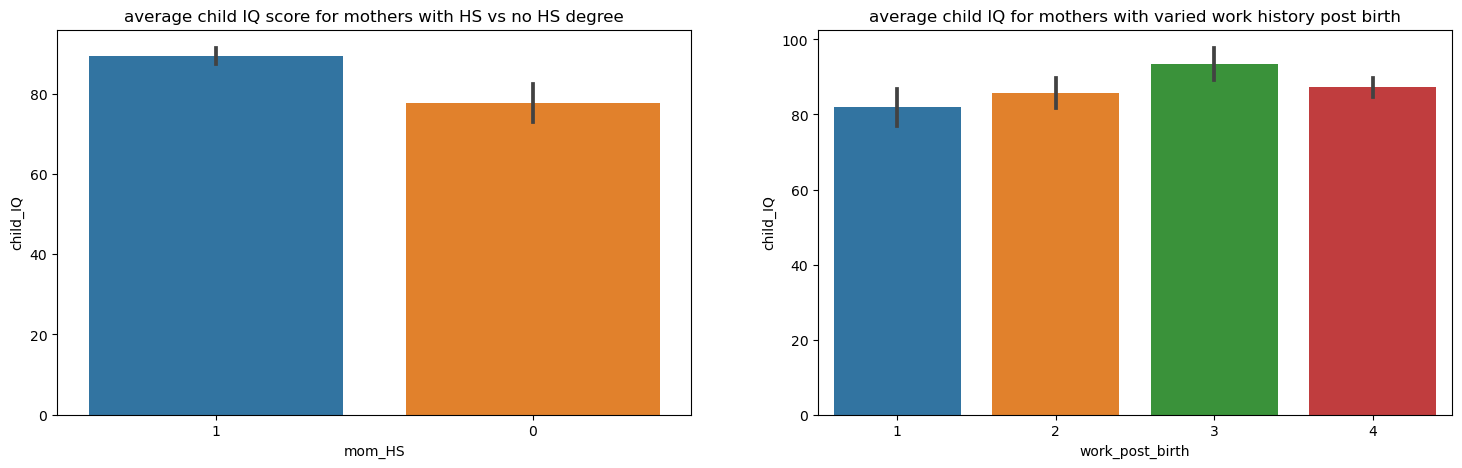

In [88]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.barplot(df["mom_HS"], df["child_IQ"])
plt.title("average child IQ score for mothers with HS vs no HS degree")

plt.subplot(1,2,2)
sns.barplot(df["work_post_birth"], df["child_IQ"])
plt.title("average child IQ for mothers with varied work history post birth")


plt.show()

After visualizing the distribution of numerical variables as well as some statistics for categoricals columns, I would like to explore relationship between score (regressand) and 2 numerical variables (mom_age &  mom_IQ) using scatterplot
         

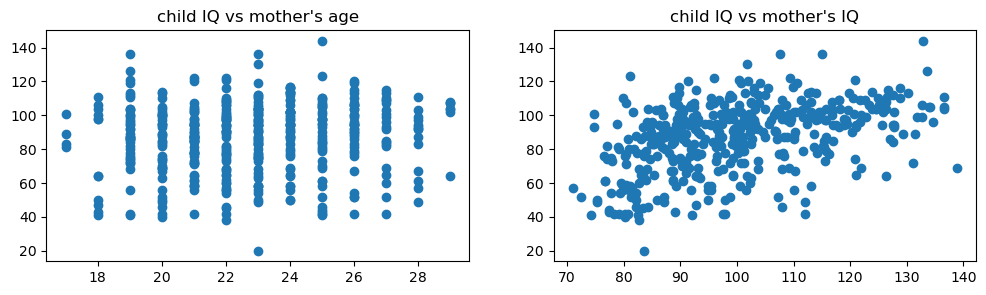

In [89]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plt.scatter(df["mom_age"], df["child_IQ"])
plt.title("child IQ vs mother's age")



plt.subplot(1,2,2)
plt.scatter(df["mom_IQ"], df["child_IQ"])
plt.title("child IQ vs mother's IQ")


plt.show()

In [18]:
#get correlation matrix 

print(df.corr())



          child_IQ   mom_age    mom_IQ
child_IQ  1.000000  0.091998  0.448276
mom_age   0.091998  1.000000  0.091608
mom_IQ    0.448276  0.091608  1.000000


As expected child's IQ is somewhat correlated to mother's IQ (corr=0.49), but mother's age does not have a strong correlation with child's IQ (corr=0.09)

# Part IV: Linear Regression Models

### Single predictor

In [90]:
from sklearn import linear_model

#target variable is childs IQ score
y=df["child_IQ"]
#with initial EDA I chose mom_IQ as a single predictor ( I oculd have used random forest for variable importance but it's beynd the scope of this dataset)
x=df[["mom_IQ"]]

lrm=linear_model.LinearRegression()
lrm.fit(x,y)

#print coefficients
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept:\n', lrm.intercept_)


Coefficients: 
 [0.60999639]

Intercept:
 25.797539872947894


From above single predictor model, we can write the following estiated model:
 
**child_IQ = mom_IQ * 0.61 + 25.80**

Interpretation: As mom's IQ increases by 1 point, child's IQ icreases by 0.61 point on average, holding all else constant. 
Constant term in a single predictor model corrsponds to the point where the fitted curve crosses y_axis, i.e. outcome that is expected to happen if the mom_IQ score takes a 0 value. 

### Multiple Predictor

In [91]:
#stat model is better than scikit learn for its summary function outputs of many imprtant metrics in tabular form

!pip install statsmodels
import statsmodels.api as sm

In [94]:
#one hot encoding for multi-level categorical variable which took some memory & research for me to figure out =) 

work_post_birth_df=pd.get_dummies(df["work_post_birth"])
work_post_birth_df.head(10)

new_df=df.drop(["work_post_birth"], axis=1).merge(work_post_birth_df, left_index=True, right_index=True)
new_df.head(10)


#one hot encoding for dummy is much simpler and nicer  just used get_dummies() in pd
new_df["mom_HS"]=pd.get_dummies(new_df["mom_HS"], drop_first=True)


#target var again is child's IQ score
y=new_df["child_IQ"]
#x predictors are all the other variables ( full model) - remember one hot encoding converted work variable into 4 categories
# using data dictionary, refer above
x=new_df[["mom_age", "mom_IQ", "mom_HS", "1", "2", "3", "4"]]


#in statsmodels you have to manually add a constant 
x=sm.add_constant(x)

sm_result=sm.OLS(y,x).fit()


#looks way better than just having coefficints, I particularly enjoy having p-values and R-squared as someone with econ degree
print(sm_result.summary())



                            OLS Regression Results                            
Dep. Variable:               child_IQ   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     20.22
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           7.53e-21
Time:                        22:34:17   Log-Likelihood:                -1870.0
No. Observations:                 434   AIC:                             3754.
Df Residuals:                     427   BIC:                             3783.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1937      7.478      2.433      0.0

The full model looks like the following:

**child_IQ = 18.20 +  mom_age * 0.22 + mom_IQ * 0.55 + mom_HS * 5.43 + no_work_3years * 2.08 + work_post_2yrs * 5.06 + work_pt *  7.56 + work_FT * 3.50**

Interpreting the numeric variables are very similar to the one we did for mom_IQ. Here, each additional year of age for mother increases child_IQ by 0.22 on average, holding all else constant (H.A.E.C) (*Please note, we saw in the earlier EDA that mom age and child_IQ have no distinct relationship so using linear model here is misleading,plus looking at the p-value 0.52 is pretty high compared to default 0.05 or 0.1 thresholds so I would omit this variable for better model prediction).

with the new full model 1 score increase of mom_IQ increases child_IQ by 0.55 score, H.A.E.C. 

For dummy variables, mom_HS seems to be contributing to the child_IQ as logically expected. Given that mom has completed HS increases child_IQ score by 5.4 points on average. The most interesting result for me was the last variable - work post birth.
Looking at P-alues only 2 of those variable subgroups look statistically significant (p_values<=0.05). I'll start with those, children IQ score increases by 5.06 points on average for mothers who work in second or third year of child's life; Child's IQ increased by 7.56 scores for mothers who work part time in child's first year of life. Other 2 subgroups were as follows: child's IQ score increases by 2.08 scores for mothers who do not work (first 3 years of child's life) & child_IQ increases by 3.50 points for mothers who work full time first year of child's life. (Whether those outcomes could count like causal effects would still need more data, better model and more research) 

### Multiple Predictors with interaction

In this model, I'll  add an interaction term between mom_IQ and mom_HS & keep all the other predictors.


In [98]:
#one hot encoding for multi-level categorical variable which took some memory & research for me to figure out =) 

work_post_birth_df=pd.get_dummies(df["work_post_birth"])
work_post_birth_df.head(10)

new_df=df.drop(["work_post_birth"], axis=1).merge(work_post_birth_df, left_index=True, right_index=True)
new_df.head(10)


#one hot encoding for dummy is much simpler and nicer  just used get_dummies() in pd
new_df["mom_HS"]=pd.get_dummies(new_df["mom_HS"], drop_first=True)

#interaction betweek HS and Mom IQ
new_df["mom_IQ_HS"]=new_df.mom_IQ*new_df.mom_HS

print(new_df.head(10))

#target var again is child's IQ score
y=new_df["child_IQ"]
#x predictors are all the other variables ( full model) - remember one hot encoding converted work variable into 4 categories
# using data dictionary, refer above
x=new_df[["mom_age","mom_IQ", "mom_HS", "1", "2", "3", "4", "mom_IQ_HS"]]


#in statsmodels you have to manually add a constant 
x=sm.add_constant(x)

sm_result=sm.OLS(y,x).fit()


#looks way better than just having coefficints, I particularly enjoy having p-values and R-squared as someone with econ degree
print(sm_result.summary())



   child_IQ  mom_HS  mom_age  mom_IQ  1  2  3  4  mom_IQ_HS
0      65.0       1     27.0  121.12  0  0  0  1     121.12
1      98.0       1     25.0   89.36  0  0  0  1      89.36
2      85.0       1     27.0  115.44  0  0  0  1     115.44
3      83.0       1     25.0   99.45  0  0  1  0      99.45
4     115.0       1     27.0   92.75  0  0  0  1      92.75
5      98.0       0     18.0  107.90  1  0  0  0       0.00
6      69.0       1     20.0  138.89  0  0  0  1     138.89
7     106.0       1     23.0  125.15  0  0  1  0     125.15
8     102.0       1     24.0   81.62  1  0  0  0      81.62
9      95.0       1     19.0   95.07  1  0  0  0      95.07
                            OLS Regression Results                            
Dep. Variable:               child_IQ   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     18.94
Date:                Wed

This final model looks like below:

**child_IQ=-14.12 + mom_age * 0.33 + mom_IQ * 0.96 + mom_HS * 51.64 - no_work_3years * 5.45 - work_post_2yrs * 3.50 - work_pt *  0.51 - work_FT * 4.66 - mom_IQ_HS * 0.49** 

It's important to note that all the coefficients changed with the interaction variable, even intercept, since model specification changed, thus resulting in different point estimation for the coefficients. 

The interaction term is now interpreted as follows: 1 point increase in mom's IQ score results **in 0.49 points less decrease for child's IQ score on average with mothers who completed HS vs not completed**. Also note that HS coefficint is much stronger now with interaction term present in the model, on average child's IQ score increases 51.63 points with mother's with HS completion. 